# Práctica para estudiantes de la Profesión de Científico de Datos

A continuación, se presenta el desarrollo de un modelo predictivo para identificar clientes con alta probabilidad de incumplir con sus pagos, utilizando los datos proporcionados.

In [44]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
# Cargar el archivo de datos
df = pd.read_csv('Empleabilidad - Cientifico de datos - Prueba_tecnica (1).csv')

# Análisis Exploratorio de Datos (EDA)

En esta fase, exploraremos las características de los datos, identificaremos valores faltantes y analizaremos la distribución de las variables, especialmente la variable objetivo.

In [46]:
# Mostrar las primeras filas y la información del dataset para una primera inspección
print("Primeras filas del dataset:")
print(df.head())
print("\nInformación del dataset:")
df.info()

Primeras filas del dataset:
   IncumplimientoPago  UsoCreditoDisponible  EdadCliente  Retrasos30_59Dias  \
0                   1              0.418539           47                  0   
1                   0              0.359368           52                  0   
2                   1              0.958418           52                  4   
3                   1              0.508746           52                  2   
4                   1              1.053210           58                  3   

   PorcentajeDeDeuda  IngresoMensual  LineasCreditoActivas  \
0           1.087704          5700.0                    25   
1           0.247432         11000.0                    14   
2           0.381882          9735.0                    15   
3           0.189944          3400.0                     5   
4           0.098159         17654.0                     9   

   Retrasos90DiasOMas  PrestamosInmobiliarios  Retrasos60_89Dias  \
0                   0                       7           

In [47]:
# Revisar valores nulos
print("\nValores nulos por columna:")
print(df.isnull().sum())


Valores nulos por columna:
IncumplimientoPago           0
UsoCreditoDisponible         0
EdadCliente                  0
Retrasos30_59Dias            0
PorcentajeDeDeuda            0
IngresoMensual            3638
LineasCreditoActivas         0
Retrasos90DiasOMas           0
PrestamosInmobiliarios       0
Retrasos60_89Dias            0
CantidadDependientes       437
dtype: int64


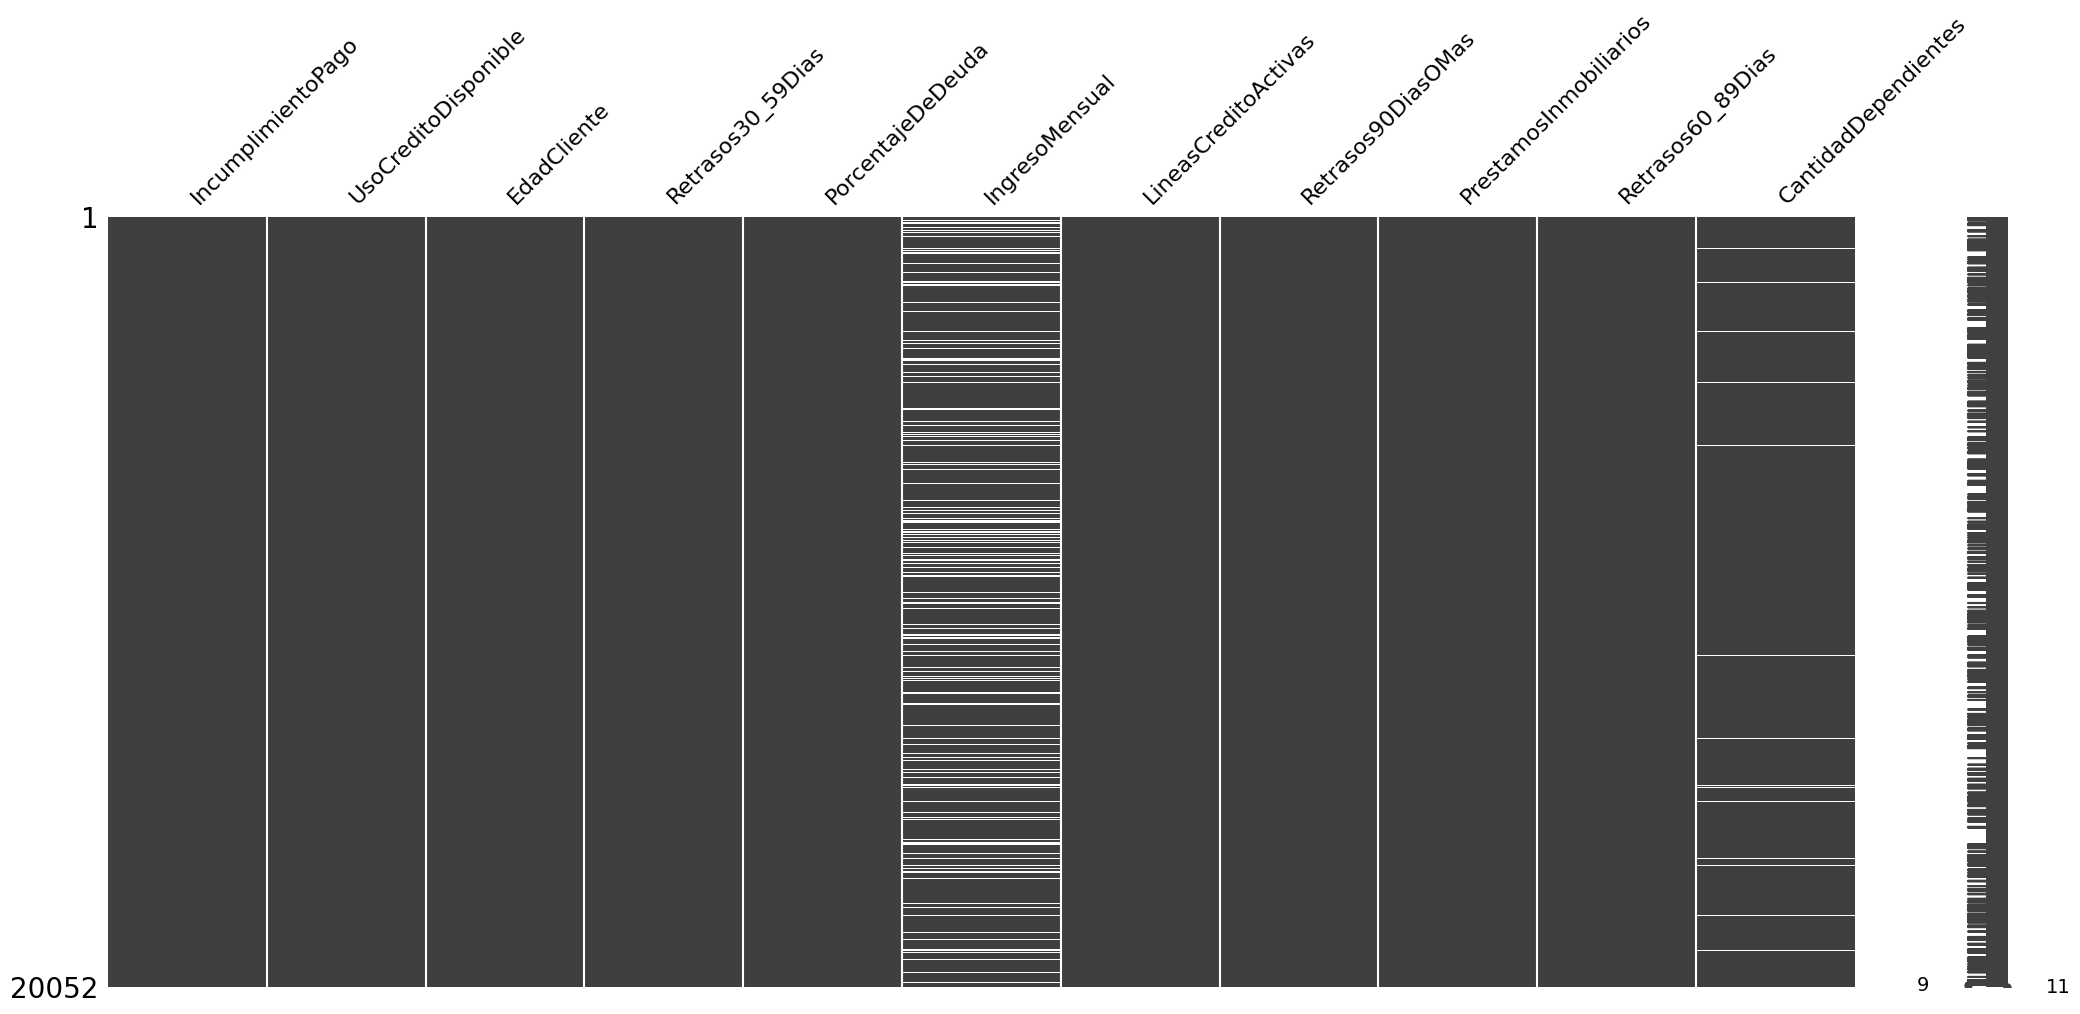

In [48]:
# Visualizar valores nulos

import missingno as msno

# Matriz de valores faltantes
msno.matrix(df)
plt.show()

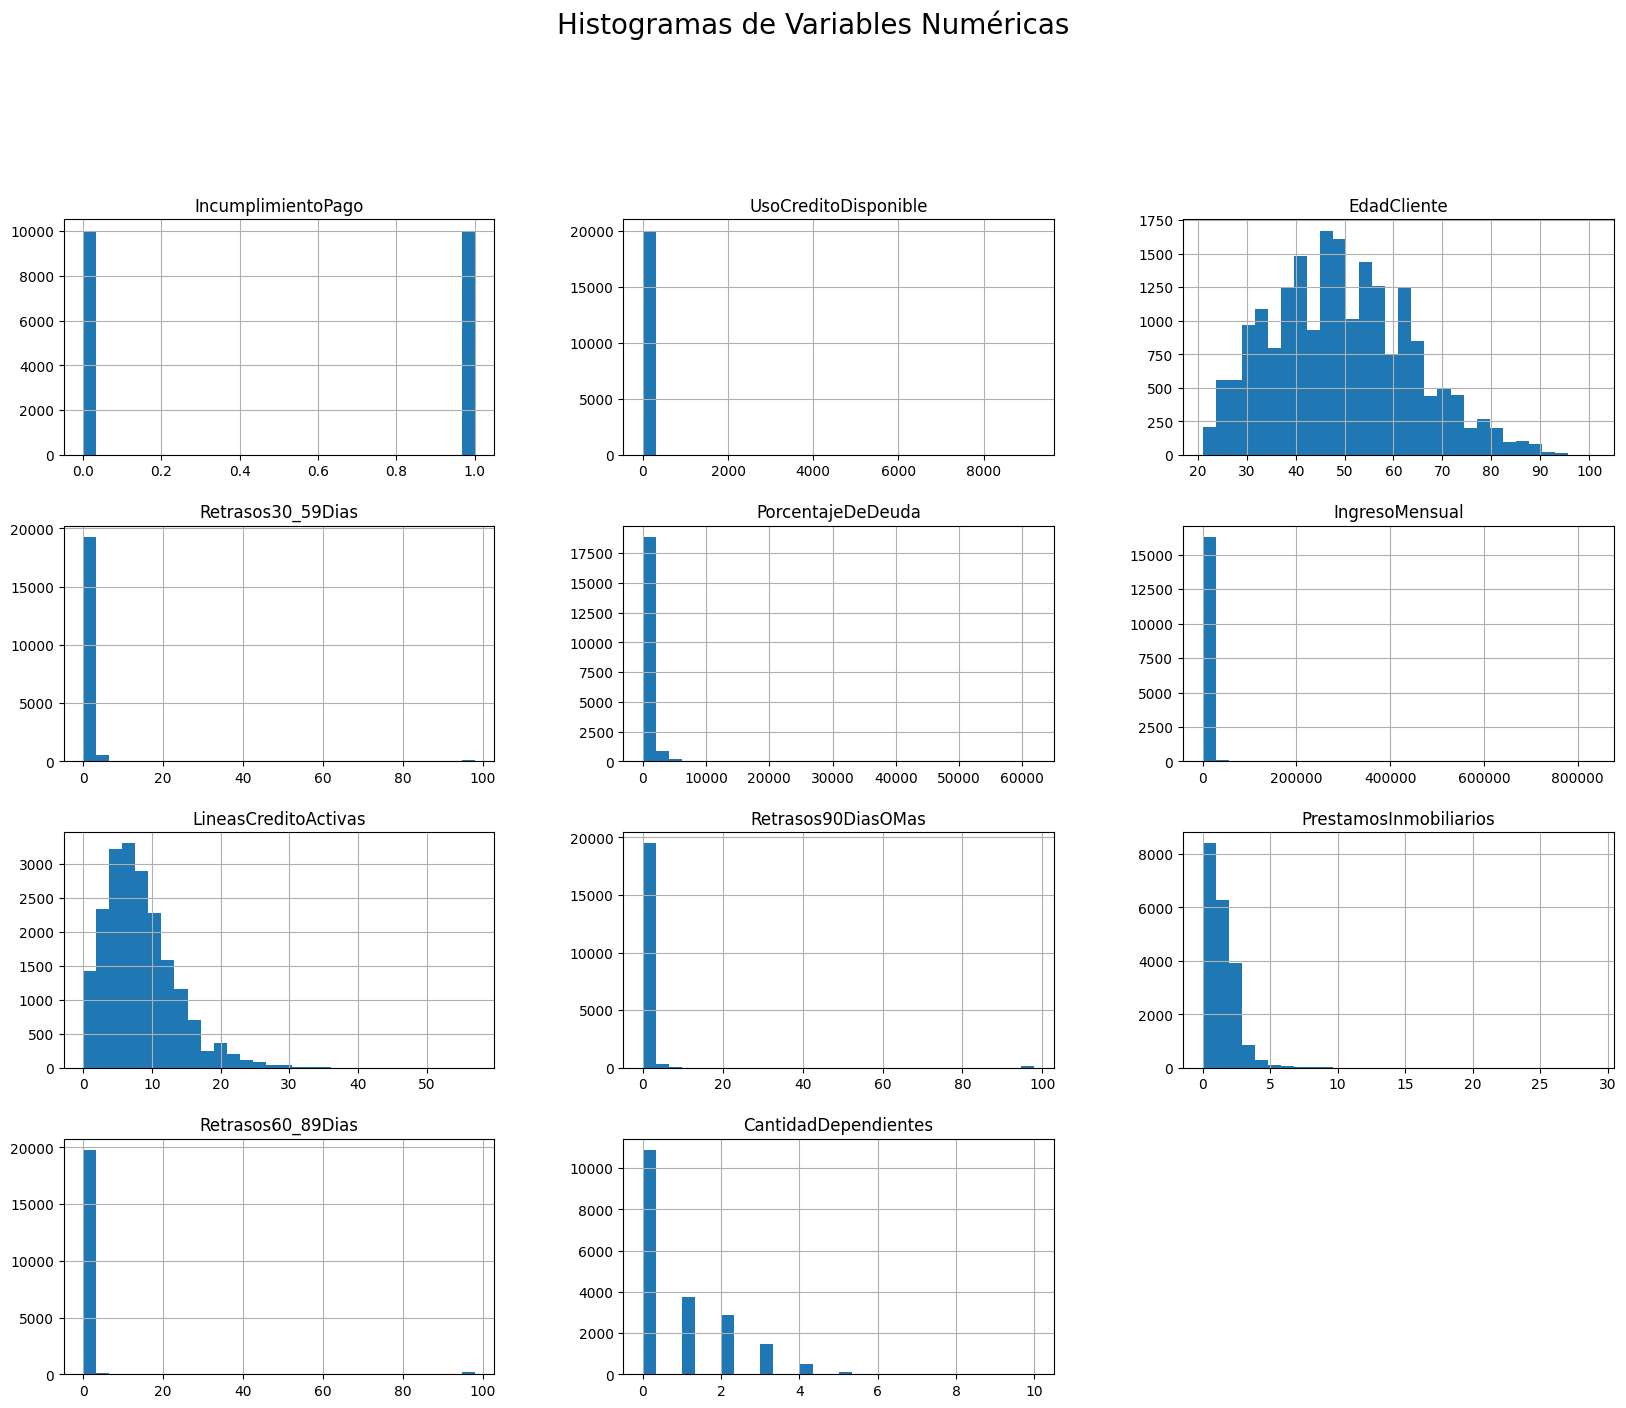

In [49]:
# Distribución de variables numéricas
df.hist(bins=30, figsize=(20, 15))
plt.suptitle('Histogramas de Variables Numéricas', y=1.02, fontsize=20)
plt.show()

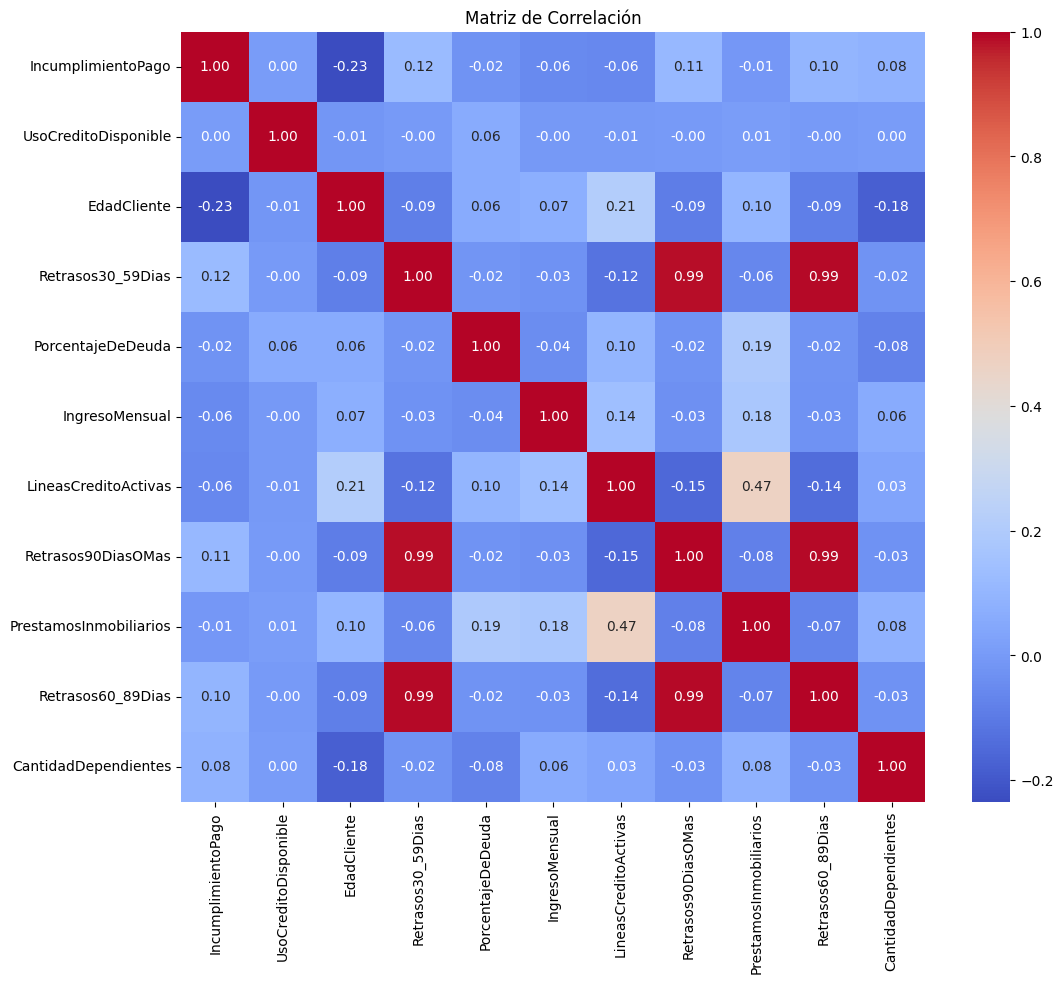

In [50]:
# Matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()

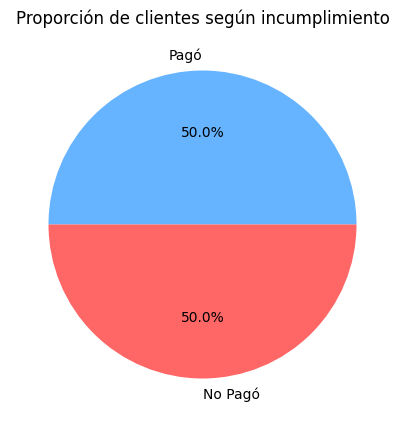

In [51]:
# Visualizar distribución de la variable objetivo

# Conteo de clases
counts = df['IncumplimientoPago'].value_counts()
percentages = df['IncumplimientoPago'].value_counts(normalize=True) * 100

# Pie chart
plt.figure(figsize=(5,5))
plt.pie(counts, labels=['Pagó','No Pagó'], autopct='%1.1f%%', colors=['#66b3ff','#ff6666'])
plt.title('Proporción de clientes según incumplimiento')
plt.show()

# Limpieza del dataset

In [52]:
# Imputar valores nulos
# Imputar IngresoMensual con la mediana
df['IngresoMensual'].fillna(df['IngresoMensual'].median(), inplace=True)
# Imputar CantidadDependientes con la moda (el valor más frecuente)
df['CantidadDependientes'].fillna(df['CantidadDependientes'].mode()[0], inplace=True)

/tmp/ipython-input-3481102558.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['IngresoMensual'].fillna(df['IngresoMensual'].median(), inplace=True)
/tmp/ipython-input-3481102558.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value

In [53]:
# Manejo de valores atípicos en variables de retrasos
# Reemplazar 96 y 98 por 0 (asumiendo que son códigos para 'sin retrasos' o 'no aplica')
for col in ['Retrasos30_59Dias', 'Retrasos60_89Dias', 'Retrasos90DiasOMas']:
    df[col].replace([96, 98], 0, inplace=True)

/tmp/ipython-input-1249615731.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace([96, 98], 0, inplace=True)


In [54]:
# Transformación de variables sesgadas para reducir el efecto de los valores atípicos
df['UsoCreditoDisponible'] = np.log1p(df['UsoCreditoDisponible'])
df['PorcentajeDeDeuda'] = np.log1p(df['PorcentajeDeDeuda'])

In [55]:
# Separar las variables predictoras (X) y la variable objetivo (y)
X = df.drop('IncumplimientoPago', axis=1)
y = df['IncumplimientoPago']

In [56]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [57]:
# Escalar las variables numéricas
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Implementación y Evaluación de Modelos
En esta sección, entrenaremos los modelos y evaluaremos su rendimiento utilizando las métricas clave.

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.7707779255319149
Recall: 0.7350398936170213
F1-Score: 0.7622823651094639
AUC: 0.8506093126662234

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.75      0.81      0.78      3008
           1       0.79      0.74      0.76      3008

    accuracy                           0.77      6016
   macro avg       0.77      0.77      0.77      6016
weighted avg       0.77      0.77      0.77      6016



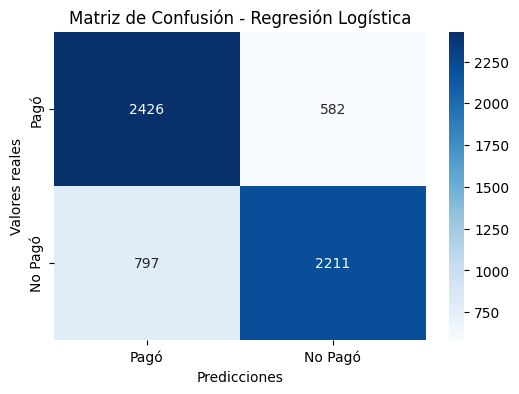

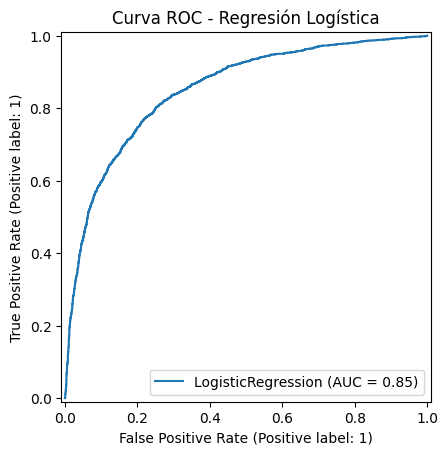

In [58]:
# Regresión Logística


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, roc_auc_score, classification_report, RocCurveDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Separar variables predictoras y objetivo
X = df.drop("IncumplimientoPago", axis=1)
y = df["IncumplimientoPago"]

# División train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Entrenar modelo
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Predicciones
y_pred = log_reg.predict(X_test)
y_proba = log_reg.predict_proba(X_test)[:, 1]


# Evaluación del modelo

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_proba))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Pagó", "No Pagó"], yticklabels=["Pagó", "No Pagó"])
plt.title("Matriz de Confusión - Regresión Logística")
plt.ylabel("Valores reales")
plt.xlabel("Predicciones")
plt.show()

# Curva ROC
RocCurveDisplay.from_estimator(log_reg, X_test, y_test)
plt.title("Curva ROC - Regresión Logística")
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



 Logistic Regression
              precision    recall  f1-score   support

           0       0.75      0.81      0.78      3008
           1       0.79      0.74      0.76      3008

    accuracy                           0.77      6016
   macro avg       0.77      0.77      0.77      6016
weighted avg       0.77      0.77      0.77      6016



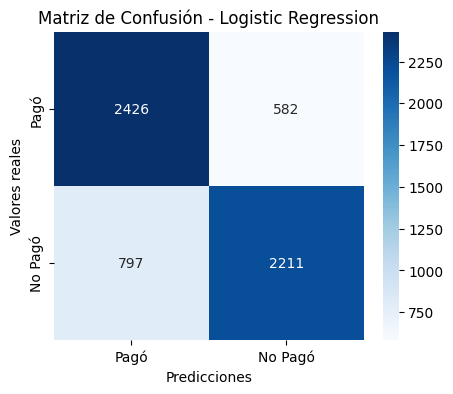

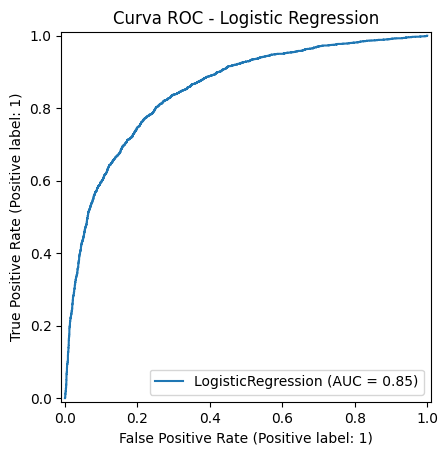


 Decision Tree
              precision    recall  f1-score   support

           0       0.70      0.69      0.69      3008
           1       0.69      0.70      0.69      3008

    accuracy                           0.69      6016
   macro avg       0.69      0.69      0.69      6016
weighted avg       0.69      0.69      0.69      6016



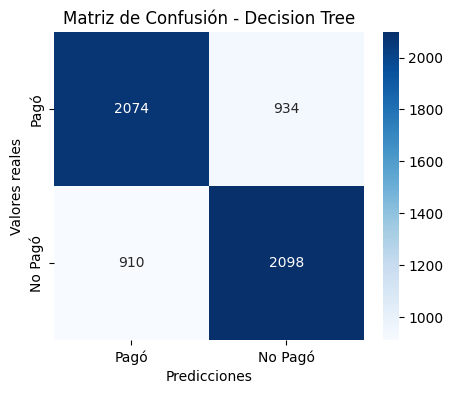

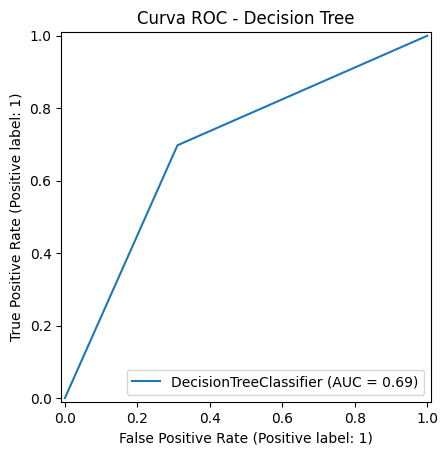


 Random Forest
              precision    recall  f1-score   support

           0       0.77      0.80      0.78      3008
           1       0.79      0.76      0.78      3008

    accuracy                           0.78      6016
   macro avg       0.78      0.78      0.78      6016
weighted avg       0.78      0.78      0.78      6016



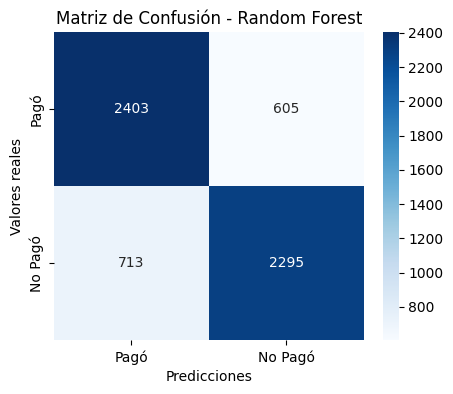

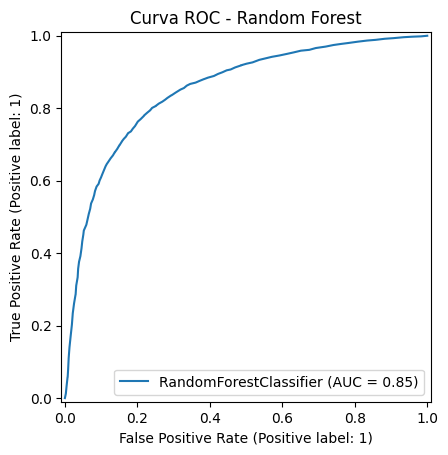


Resumen comparativo de modelos:



,Modelo,Accuracy,Recall,F1-Score,AUC
0,Logistic Regression,0.770778,0.735040,0.762282,0.850609
1,Decision Tree,0.693484,0.697473,0.694702,0.693548
2,Random Forest,0.780918,0.762965,0.776913,0.851035


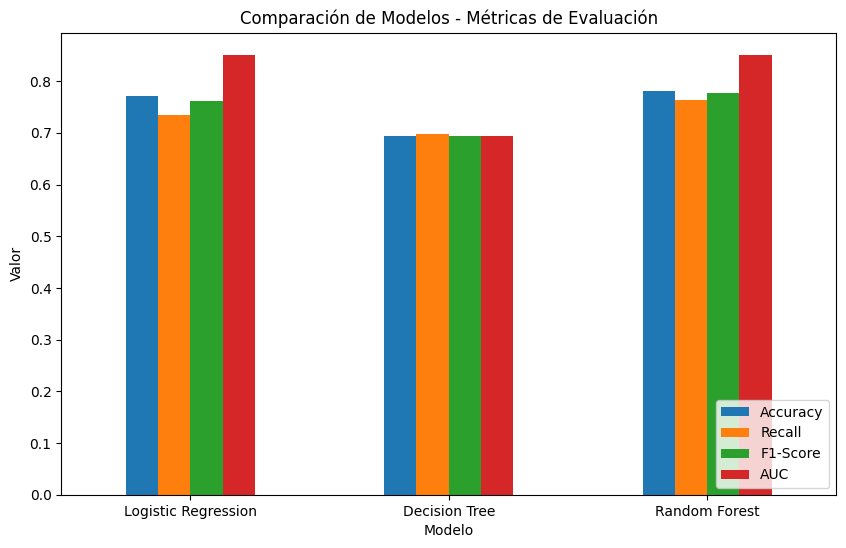

In [59]:
# Modelos: Logistic, DecisionTree, RandomForest

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Diccionario de modelos
modelos = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

# Resultados
resultados = []

for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    y_proba = modelo.predict_proba(X_test)[:,1]

    resultados.append({
        "Modelo": nombre,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred),
        "AUC": roc_auc_score(y_test, y_proba)
    })

    print(f"\n {nombre}")
    print(classification_report(y_test, y_pred))

    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Pagó", "No Pagó"], yticklabels=["Pagó", "No Pagó"])
    plt.title(f"Matriz de Confusión - {nombre}")
    plt.ylabel("Valores reales")
    plt.xlabel("Predicciones")
    plt.show()

    # Curva ROC
    RocCurveDisplay.from_estimator(modelo, X_test, y_test)
    plt.title(f"Curva ROC - {nombre}")
    plt.show()


# Comparación de métricas

df_resultados = pd.DataFrame(resultados)
print("\nResumen comparativo de modelos:\n")
display(df_resultados)

# Gráfico comparativo
df_resultados.set_index("Modelo")[["Accuracy", "Recall", "F1-Score", "AUC"]].plot(kind="bar", figsize=(10,6))
plt.title("Comparación de Modelos - Métricas de Evaluación")
plt.ylabel("Valor")
plt.xticks(rotation=0)
plt.legend(loc="lower right")
plt.show()

**Conclusiones preliminares**.
La variable objetivo se encuentra balanceada intencionalmente, por lo que crearemos un dataset desbalanceado para probar el modelo en un escenario más realista.

# Generar un dataset desbalanceado

In [60]:
# Simular dataset desbalanceado (ejemplo: 90% pagos / 10% no pagos)


df_pagaron = df[df["IncumplimientoPago"] == 0].sample(frac=0.9, random_state=42)
df_incumplio = df[df["IncumplimientoPago"] == 1].sample(frac=0.1, random_state=42)

df_desbalanceado = pd.concat([df_pagaron, df_incumplio])
print(df_desbalanceado["IncumplimientoPago"].value_counts(normalize=True))

IncumplimientoPago
0    0.89996
1    0.10004
Name: proportion, dtype: float64


In [61]:
from sklearn.model_selection import train_test_split

# Separar features y target
X_desbalanceado = df_desbalanceado.drop("IncumplimientoPago", axis=1)
y_desbalanceado = df_desbalanceado["IncumplimientoPago"]

# Dividir en train y test (estratificado para mantener proporciones)
X_train_desb, X_test_desb, y_train_desb, y_test_desb = train_test_split(
    X_desbalanceado, y_desbalanceado, test_size=0.3, random_state=42, stratify=y_desbalanceado
)

print("Tamaño de train:", X_train_desb.shape)
print("Tamaño de test:", X_test_desb.shape)
print("Distribución en train:\n", y_train_desb.value_counts(normalize=True))
print("Distribución en test:\n", y_test_desb.value_counts(normalize=True))

Tamaño de train: (7018, 10)
Tamaño de test: (3008, 10)
Distribución en train:
 IncumplimientoPago
0    0.899972
1    0.100028
Name: proportion, dtype: float64
Distribución en test:
 IncumplimientoPago
0    0.899934
1    0.100066
Name: proportion, dtype: float64


In [62]:
# Evaluar modelos previamente entrenados en dataset balanceado
for nombre, modelo in modelos.items():
    y_pred_desb = modelo.predict(X_test_desb)
    y_proba_desb = modelo.predict_proba(X_test_desb)[:,1]

    print(f"\n {nombre} - Evaluación sobre dataset desbalanceado")
    print("Accuracy:", accuracy_score(y_test_desb, y_pred_desb))
    print("Recall:", recall_score(y_test_desb, y_pred_desb))
    print("F1-Score:", f1_score(y_test_desb, y_pred_desb))
    print("AUC:", roc_auc_score(y_test_desb, y_proba_desb))


 Logistic Regression - Evaluación sobre dataset desbalanceado
Accuracy: 0.8035239361702128
Recall: 0.7475083056478405
F1-Score: 0.4322766570605187
AUC: 0.8714008347989156

 Decision Tree - Evaluación sobre dataset desbalanceado
Accuracy: 0.929188829787234
Recall: 0.9335548172757475
F1-Score: 0.7251612903225807
AUC: 0.9341899370034867

 Random Forest - Evaluación sobre dataset desbalanceado
Accuracy: 0.9491356382978723
Recall: 0.9302325581395349
F1-Score: 0.7854137447405329
AUC: 0.9816263237797417


**Observaciones importantes**

* **Accuracy engañosa**

  * Con el dataset desbalanceado, los modelos pueden tener un accuracy alto simplemente prediciendo la clase mayoritaria. Por eso, métricas como Recall, F1 y AUC son más importantes.

* **Random Forest sigue siendo el mejor modelo**

  * Alto recall: detecta la mayoría de los clientes que incumplirán.

  * F1 elevado: buen balance entre precisión y recall.

  * AUC muy alto: excelente capacidad de discriminar entre clases.

* **Logistic Regression se ve afectada por el desbalance**


# Reentrenamiento de modelos

In [63]:
# Aplicar SMOTE para balancear dataset desbalanceado

from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score, classification_report

# Separar features y target
X = X_train_desb
y = y_train_desb

# Aplicar SMOTE solo sobre train
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X, y)

print("Distribución después de SMOTE:\n", y_train_smote.value_counts())

# Definir modelos
modelos_smote = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

# Entrenar y evaluar
resultados_smote = []

for nombre, modelo in modelos_smote.items():
    modelo.fit(X_train_smote, y_train_smote)
    y_pred = modelo.predict(X_test_desb)
    y_proba = modelo.predict_proba(X_test_desb)[:,1]

    resultados_smote.append({
        "Modelo": nombre,
        "Accuracy": accuracy_score(y_test_desb, y_pred),
        "Recall": recall_score(y_test_desb, y_pred),
        "F1-Score": f1_score(y_test_desb, y_pred),
        "AUC": roc_auc_score(y_test_desb, y_proba)
    })

    print(f"\n {nombre} - Evaluación con SMOTE")
    print(classification_report(y_test_desb, y_pred))

# Tabla resumen
import pandas as pd
df_resultados_smote = pd.DataFrame(resultados_smote)
print("\nResumen comparativo con SMOTE:")
display(df_resultados_smote)

Distribución después de SMOTE:
 IncumplimientoPago
0    6316
1    6316
Name: count, dtype: int64


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



 Logistic Regression - Evaluación con SMOTE
              precision    recall  f1-score   support

           0       0.97      0.76      0.85      2707
           1       0.26      0.79      0.40       301

    accuracy                           0.76      3008
   macro avg       0.62      0.77      0.62      3008
weighted avg       0.90      0.76      0.80      3008


 Random Forest - Evaluación con SMOTE
              precision    recall  f1-score   support

           0       0.94      0.91      0.92      2707
           1       0.36      0.47      0.40       301

    accuracy                           0.86      3008
   macro avg       0.65      0.69      0.66      3008
weighted avg       0.88      0.86      0.87      3008


Resumen comparativo con SMOTE:


,Modelo,Accuracy,Recall,F1-Score,AUC
0,Logistic Regression,0.758976,0.790698,0.396336,0.839097
1,Random Forest,0.862699,0.465116,0.404040,0.826532


📊 Resumen comparativo de todos los escenarios:


,Modelo,Escenario,Accuracy,Recall,F1-Score,AUC
0,Logistic Regression,Balanceado 50/50,0.770778,0.735040,0.762282,0.850609
1,Decision Tree,Balanceado 50/50,0.693484,0.697473,0.694702,0.693548
2,Random Forest,Balanceado 50/50,0.780918,0.762965,0.776913,0.851035
3,Logistic Regression,Desbalanceado 90/10,0.805186,0.637874,0.395876,0.805620
4,Decision Tree,Desbalanceado 90/10,0.930851,0.940199,0.731266,0.936539
5,Random Forest,Desbalanceado 90/10,0.949801,0.936877,0.788811,0.982214
6,Logistic Regression,Desbalanceado + SMOTE,0.673205,0.627908,0.277737,0.692373
7,Random Forest,Desbalanceado + SMOTE,0.863032,0.511628,0.427778,0.831923


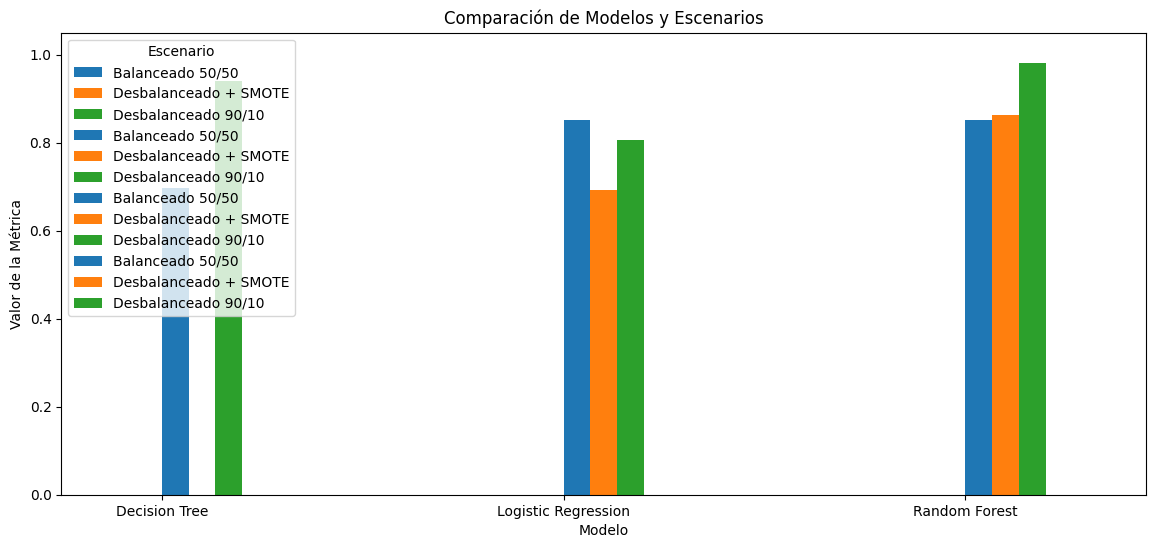

In [64]:
import matplotlib.pyplot as plt
import pandas as pd

# ============================
# Crear DataFrame con los 3 escenarios
# ============================
data_comparativa = {
    "Modelo": [
        "Logistic Regression", "Decision Tree", "Random Forest",
        "Logistic Regression", "Decision Tree", "Random Forest",
        "Logistic Regression", "Random Forest"
    ],
    "Escenario": [
        "Balanceado 50/50", "Balanceado 50/50", "Balanceado 50/50",
        "Desbalanceado 90/10", "Desbalanceado 90/10", "Desbalanceado 90/10",
        "Desbalanceado + SMOTE", "Desbalanceado + SMOTE"
    ],
    "Accuracy": [
        0.770778, 0.693484, 0.780918,
        0.805186, 0.930851, 0.949801,
        0.673205, 0.863032
    ],
    "Recall": [
        0.735040, 0.697473, 0.762965,
        0.637874, 0.940199, 0.936877,
        0.627908, 0.511628
    ],
    "F1-Score": [
        0.762282, 0.694702, 0.776913,
        0.395876, 0.731266, 0.788811,
        0.277737, 0.427778
    ],
    "AUC": [
        0.850609, 0.693548, 0.851035,
        0.805620, 0.936539, 0.982214,
        0.692373, 0.831923
    ]
}

df_comparativa = pd.DataFrame(data_comparativa)

# Mostrar tabla
print("📊 Resumen comparativo de todos los escenarios:")
display(df_comparativa)

# ============================
# Gráfico comparativo
# ============================
fig, ax = plt.subplots(1, 1, figsize=(14,6))
metrics = ["Accuracy", "Recall", "F1-Score", "AUC"]

for metric in metrics:
    df_pivot = df_comparativa.pivot(index="Modelo", columns="Escenario", values=metric)
    df_pivot.plot(kind="bar", ax=ax, width=0.2, position=0)

plt.title("Comparación de Modelos y Escenarios")
plt.ylabel("Valor de la Métrica")
plt.ylim(0,1.05)
plt.xticks(rotation=0)
plt.legend(title="Escenario")
plt.show()

# Diagrama de flujo del proceso de crédito

In [65]:
from graphviz import Digraph

dot = Digraph(comment='Proceso de Evaluación de Créditos')

# Nodos
dot.node('A', 'Ingreso de Cliente')
dot.node('B', 'Recopilación de Datos')
dot.node('C', 'Predicción de Probabilidad de Incumplimiento (Random Forest)')
dot.node('D', 'Clasificación de Riesgo')
dot.node('E', 'Decisión de Crédito')
dot.node('F', 'Dashboard para Personal')
dot.node('G', 'Monitoreo y Reentrenamiento')

# Conexiones
dot.edges(['AB', 'BC', 'CD', 'DE'])
dot.edge('D', 'F', label='Visualización de riesgo')
dot.edge('E', 'G', label='Actualizar modelo periódicamente')

# Mostrar diagrama
dot.render('flujo_creditos', format='png', view=True)

'flujo_creditos.png'

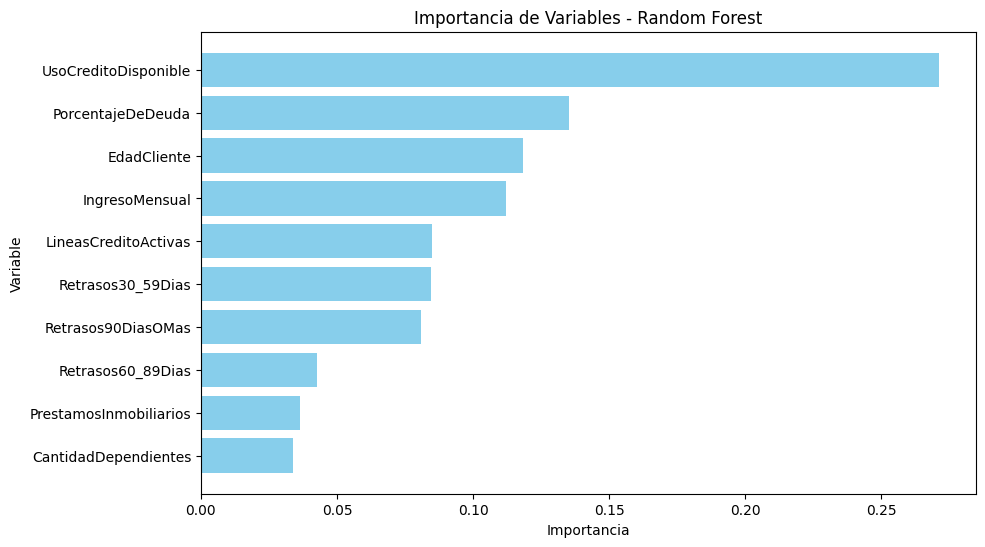

In [66]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Obtener feature importances
importances = modelos['Random Forest'].feature_importances_
features = X_train_desb.columns
df_importance = pd.DataFrame({'Feature': features, 'Importance': importances})
df_importance = df_importance.sort_values(by='Importance', ascending=True)

# Gráfico horizontal
plt.figure(figsize=(10,6))
plt.barh(df_importance['Feature'], df_importance['Importance'], color='skyblue')
plt.title('Importancia de Variables - Random Forest')
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.show()